# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# base_url = 'https://api.openweathermap.org/data/2.5/weather?'
# units = "metric"
# # Build partial query URL
# parameter_1 = 'q='
# parameter_2 = '&appid='
# parameter_3 = '&units='
# cities = [london, delhi, moscow]
# city_data = []
# for city in cities:
#     combined_url = f"{base_url}{parameter_1}{city}{parameter_2}{weather_api_key}"
#     response = requests.get(combined_url).json()
#     city_data.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])


In [5]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
units = "metric"
# Build partial query URL
parameter_1 = 'q='
parameter_2 = '&appid='
parameter_3 = '&units='
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):   
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{base_url}{parameter_1}{city}{parameter_2}{weather_api_key}{parameter_3}{units}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | makakilo city
Processing Record 3 of Set 1 | phan thiet
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | portland
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | assiniboia
Processing Record 10 of Set 1 | yeppoon
Processing Record 11 of Set 1 | honiara
Processing Record 12 of Set 1 | fengcheng
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | igrim
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | boundiali
Processing Record 18 of Set 1 | abalak
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | koceljeva
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | port alfred


Processing Record 40 of Set 4 | hervey bay
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | herat
Processing Record 43 of Set 4 | puerto suarez
Processing Record 44 of Set 4 | beloha
Processing Record 45 of Set 4 | abatskoye
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | ashqelon
Processing Record 0 of Set 5 | torbay
Processing Record 1 of Set 5 | guararapes
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | prigorodka
Processing Record 4 of Set 5 | cuamba
Processing Record 5 of Set 5 | calderitas
Processing Record 6 of Set 5 | atasu
Processing Record 7 of Set 5 | moranbah
Processing Record 8 of Set 5 | flagstaff
Processing Record 9 of Set 5 | pitimbu
Processing Record 10 of Set 5 | cururupu
Processing Record 11 of Set 5 | padang
Processing Record 12 of Set 5 | saint-francois
Processing Record 13 of Set 5 | west wendover
Processing Reco

Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | beihai
Processing Record 35 of Set 8 | vega alta
Processing Record 36 of Set 8 | boysun
Processing Record 37 of Set 8 | rocha
Processing Record 38 of Set 8 | naron
Processing Record 39 of Set 8 | yilan
Processing Record 40 of Set 8 | matara
Processing Record 41 of Set 8 | burns lake
Processing Record 42 of Set 8 | blythe
Processing Record 43 of Set 8 | pangnirtung
Processing Record 44 of Set 8 | samusu
City not found. Skipping...
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | cazin
Processing Record 48 of Set 8 | russell
Processing Record 49 of Set 8 | chabahar
Processing Record 0 of Set 9 | clyde river
Processing Record 1 of Set 9 | presidente olegario
Processing Record 2 of Set 9 | tilichiki
Processing Record 3 of Set 9 | tessalit
Processing Record 4 of Set 9 | akdepe
Processing Record 5 of Set 9 | kerema
Processing Record 6 of Set 9 | belyy yar

City not found. Skipping...
Processing Record 18 of Set 12 | petropavlovka
Processing Record 19 of Set 12 | ghugus
Processing Record 20 of Set 12 | svolvaer
Processing Record 21 of Set 12 | inuvik
Processing Record 22 of Set 12 | tambovka
Processing Record 23 of Set 12 | rabo de peixe
Processing Record 24 of Set 12 | santiago del estero
Processing Record 25 of Set 12 | siilinjarvi
Processing Record 26 of Set 12 | chlorakas
Processing Record 27 of Set 12 | porto novo
Processing Record 28 of Set 12 | tura
Processing Record 29 of Set 12 | alindao
Processing Record 30 of Set 12 | montebelluna
Processing Record 31 of Set 12 | devgarh
Processing Record 32 of Set 12 | lalomanu
City not found. Skipping...
Processing Record 33 of Set 12 | luau
Processing Record 34 of Set 12 | dusi
Processing Record 35 of Set 12 | mount isa
Processing Record 36 of Set 12 | oistins
City not found. Skipping...
Processing Record 37 of Set 12 | huilong
Processing Record 38 of Set 12 | savannah bight
Processing Recor

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-6.36,85,100,3.75,CA,1680112856
1,makakilo city,21.3469,-158.0858,25.18,78,20,6.69,US,1680113247
2,phan thiet,10.9333,108.1000,23.96,89,97,2.80,VN,1680113455
3,hobart,-42.8794,147.3294,12.92,79,100,5.14,AU,1680112954
4,ushuaia,-54.8000,-68.3000,4.34,66,81,2.59,AR,1680112936
...,...,...,...,...,...,...,...,...,...
565,kavaratti,10.5669,72.6420,27.57,70,54,3.92,IN,1680113193
566,nome,64.5011,-165.4064,-5.96,93,100,10.29,US,1680113219
567,usinsk,65.9939,57.5281,-13.74,93,20,3.51,RU,1680113612
568,loudi,27.7344,111.9944,11.38,94,92,0.56,CN,1680113613


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("Output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-6.36,85,100,3.75,CA,1680112856
1,makakilo city,21.3469,-158.0858,25.18,78,20,6.69,US,1680113247
2,phan thiet,10.9333,108.1000,23.96,89,97,2.80,VN,1680113455
3,hobart,-42.8794,147.3294,12.92,79,100,5.14,AU,1680112954
4,ushuaia,-54.8000,-68.3000,4.34,66,81,2.59,AR,1680112936
...,...,...,...,...,...,...,...,...,...
565,kavaratti,10.5669,72.6420,27.57,70,54,3.92,IN,1680113193
566,nome,64.5011,-165.4064,-5.96,93,100,10.29,US,1680113219
567,usinsk,65.9939,57.5281,-13.74,93,20,3.51,RU,1680113612


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

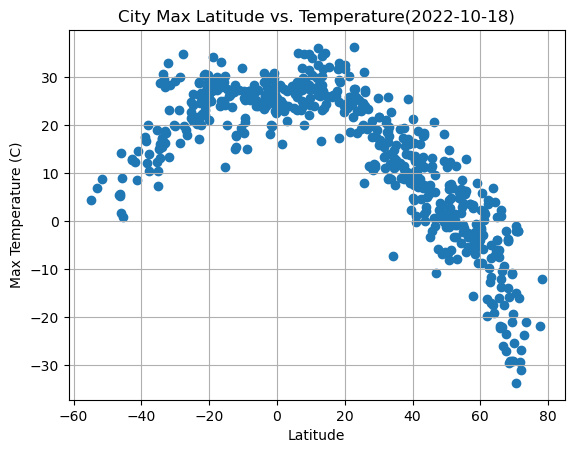

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title('City Max Latitude vs. Temperature(2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("Output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

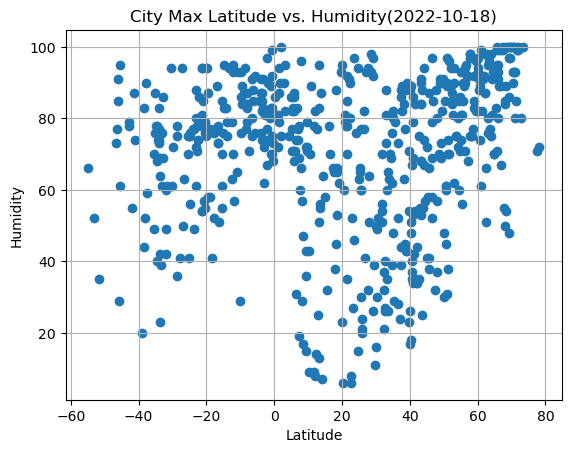

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Max Latitude vs. Humidity(2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("Output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

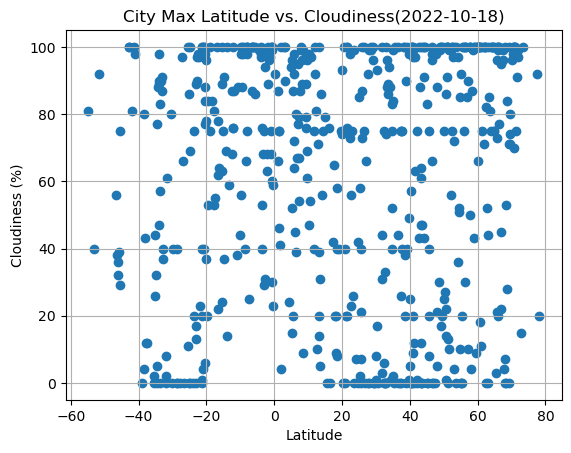

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Max Latitude vs. Cloudiness(2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("Output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

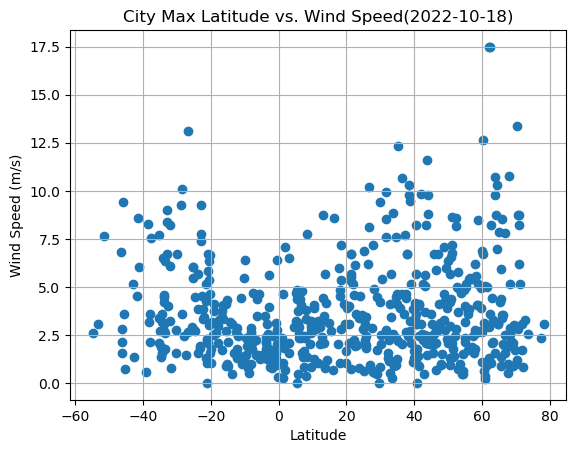

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('City Max Latitude vs. Wind Speed(2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("Output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0), :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-6.36,85,100,3.75,CA,1680112856
1,makakilo city,21.3469,-158.0858,25.18,78,20,6.69,US,1680113247
2,phan thiet,10.9333,108.1000,23.96,89,97,2.80,VN,1680113455
5,portland,45.5234,-122.6762,11.14,87,75,1.54,US,1680113211
6,khatanga,71.9667,102.5000,-31.09,100,99,0.85,RU,1680113089


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0), :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hobart,-42.8794,147.3294,12.92,79,100,5.14,AU,1680112954
4,ushuaia,-54.8000,-68.3000,4.34,66,81,2.59,AR,1680112936
7,hithadhoo,-0.6000,73.0833,28.27,75,30,2.75,MV,1680113108
9,yeppoon,-23.1333,150.7333,20.88,88,17,1.93,AU,1680113456
10,honiara,-9.4333,159.9500,25.27,89,100,1.92,SB,1680113457


###  Temperature vs. Latitude Linear Regression Plot

In [17]:
# Linear regression on Northern Hemisphere, temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# Get regression values
regress_values = slope * northern_hemi_df["Lat"] + intercept

y = -0.67x + 36.08
0.7913470113359234


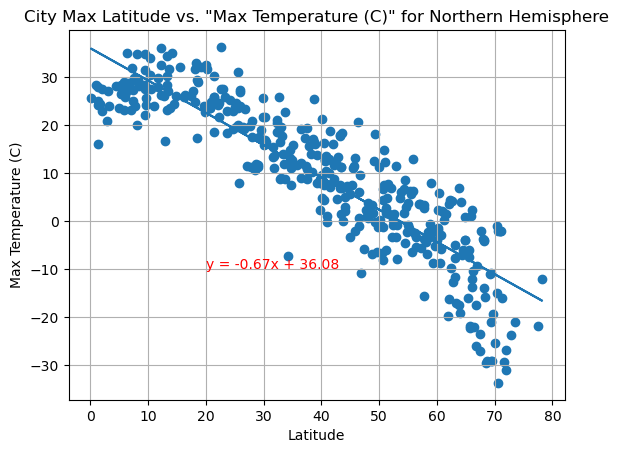

In [18]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (20, -10), color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title('City Max Latitude vs. "Max Temperature (C)" for Northern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

In [19]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
# Get regression values
regress_values = slope * southern_hemi_df["Lat"] + intercept

y = 0.32x + 28.97
0.39345672765352135


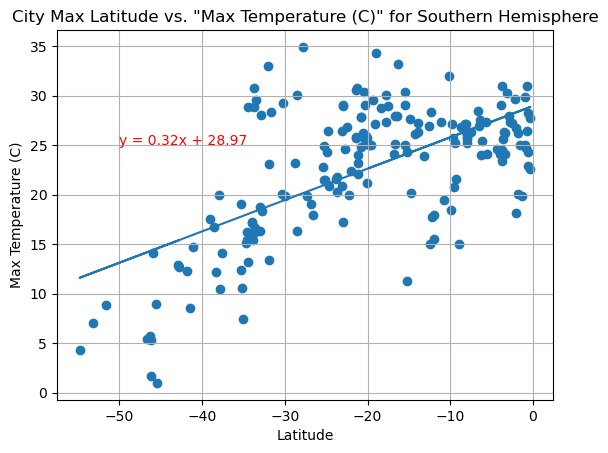

In [20]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (-50, 25), color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title('City Max Latitude vs. "Max Temperature (C)" for Southern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [21]:
# Linear regression on Northern Hemisphere, Humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# Get regression values
regress_values = slope * northern_hemi_df["Lat"] + intercept

y = 0.41x + 52.84
0.11927287125349648


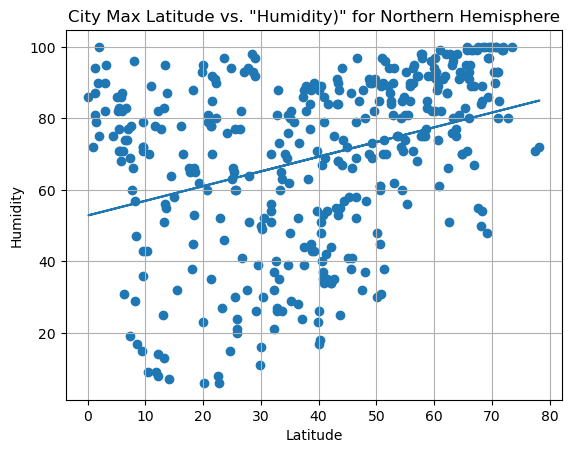

In [22]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (20, -10), color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Max Latitude vs. "Humidity)" for Northern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

In [23]:
# Linear regression on Southern Hemisphere, Humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
# Get regression values
regress_values = slope * southern_hemi_df["Lat"] + intercept

y = 0.44x + 82.31
0.14103706471669672


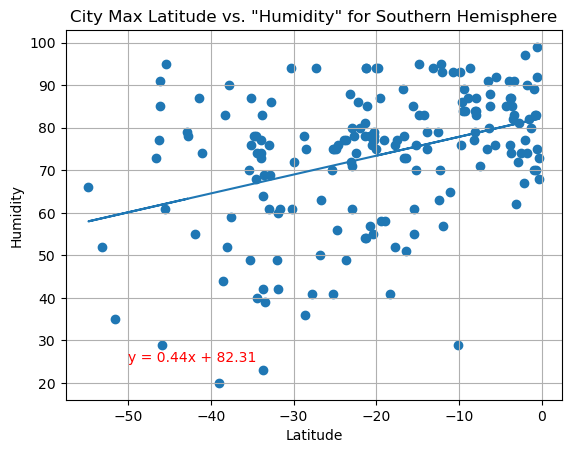

In [24]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (-50, 25), color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Max Latitude vs. "Humidity" for Southern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [25]:
# Linear regression on Northern Hemisphere, Cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
# Get regression values
regress_values = slope * northern_hemi_df["Lat"] + intercept

y = 0.16x + 53.83
0.0070186396247025225


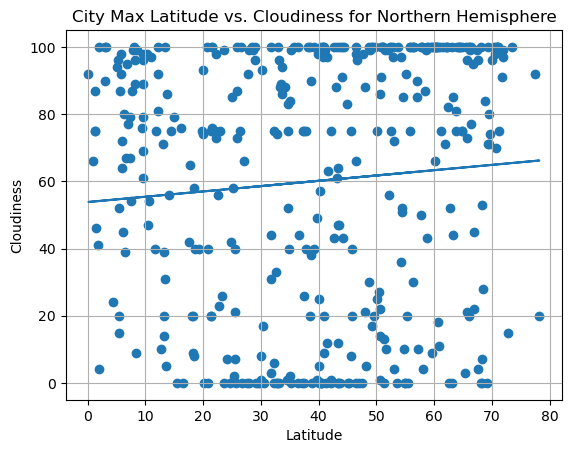

In [26]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (20, -10), color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('City Max Latitude vs. Cloudiness for Northern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

In [27]:
# Linear regression on Southern Hemisphere, Cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
# Get regression values
regress_values = slope * southern_hemi_df["Lat"] + intercept

y = 0.84x + 79.95
0.10462168058865516


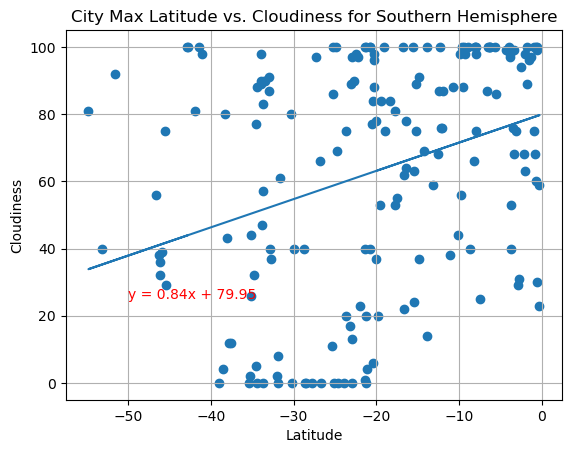

In [28]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (-50, 25), color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('City Max Latitude vs. Cloudiness for Southern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [29]:
# Linear regression on Northern Hemisphere, Wind Speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
# Get regression values
regress_values = slope * northern_hemi_df["Lat"] + intercept

y = 0.02x + 2.99
0.019901736771603944


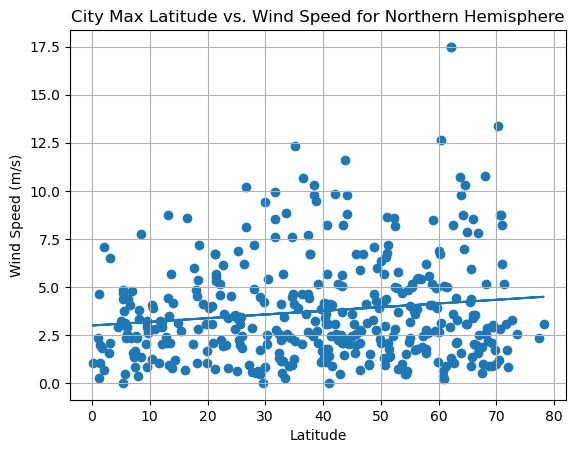

In [30]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (20, -10), color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('City Max Latitude vs. Wind Speed for Northern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

In [31]:
# Linear regression on Southern Hemisphere, Wind Speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
# Get regression values
regress_values = slope * southern_hemi_df["Lat"] + intercept

y = -0.06x + 2.06
0.13983156531479599


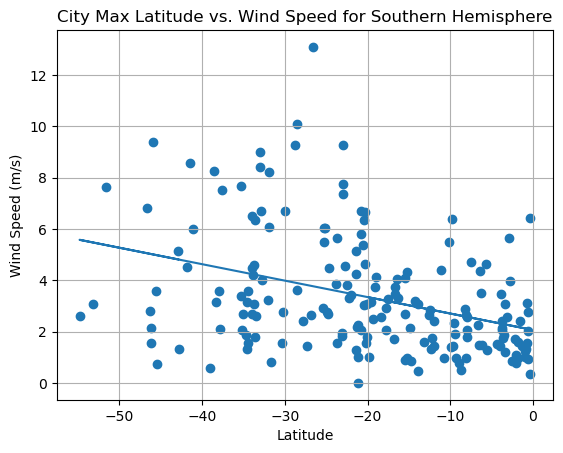

In [32]:
# Create line equation string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(line_eq)
# Label plot and annotate the line equation
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values)
plt.annotate(line_eq, (-50, 25), color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('City Max Latitude vs. Wind Speed for Southern Hemisphere')
plt.grid()
# Print r square value
print(rvalue**2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE